In [2]:

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [3]:
df = pd.read_csv('data/Annual precipitation inches Lake Huron 1900 to 1986.csv')

Скользящее среднее(Окна 3 и 10)

In [4]:
df['MA_window_3'] = df['x'].rolling(window=3).mean()
df['MA_window_10'] = df['x'].rolling(window=10).mean()

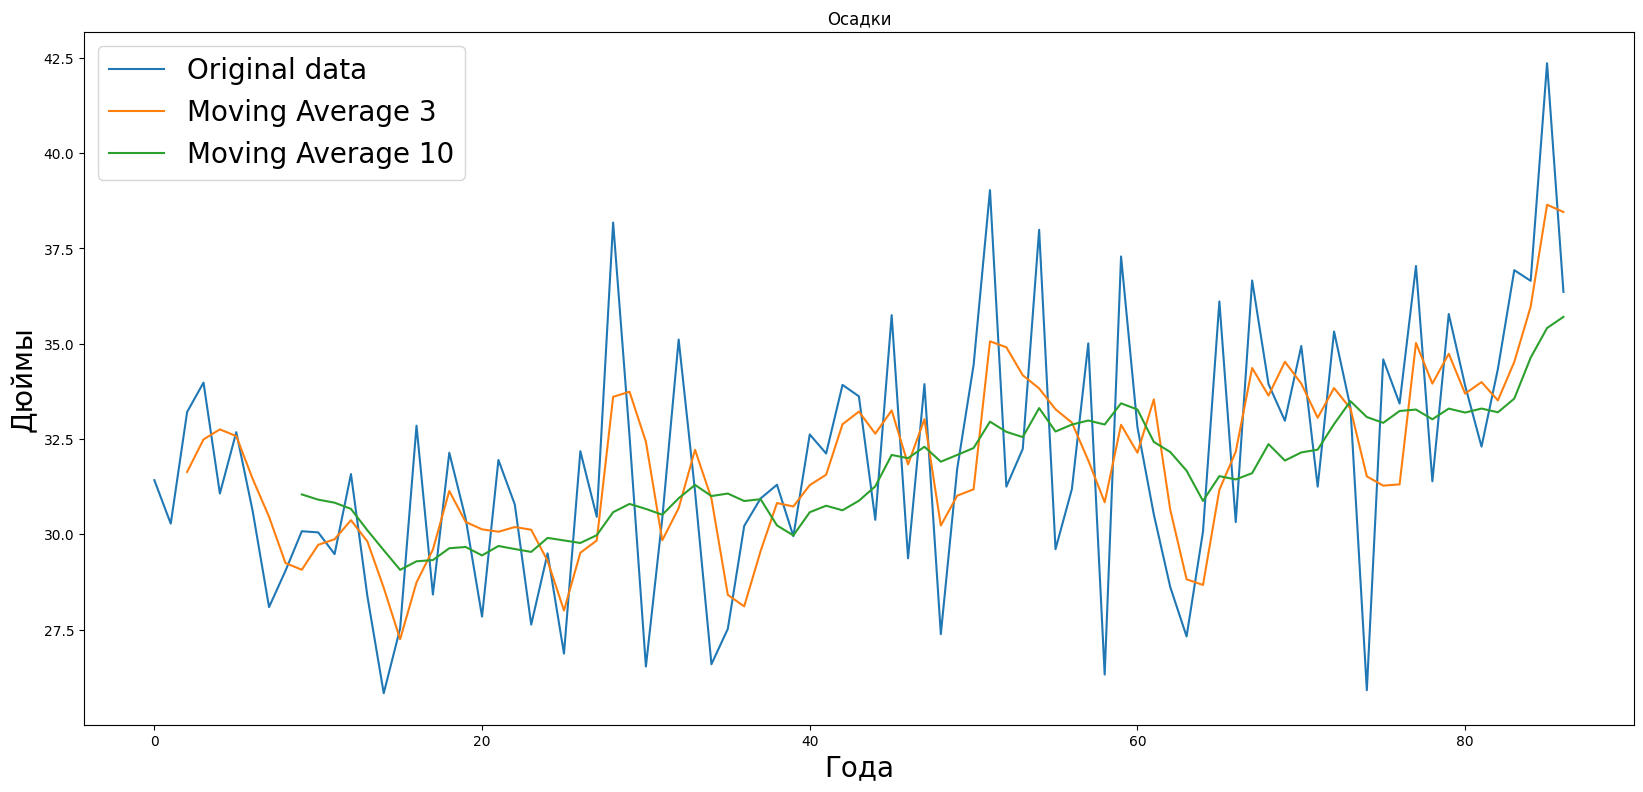

In [5]:
fig = plt.figure(figsize=(20, 9))
plt.plot(df['x'], label='Original data')
plt.plot(df['MA_window_3'], label='Moving Average 3')
plt.plot(df['MA_window_10'], label='Moving Average 10')
plt.legend(fontsize="20")
plt.title('Осадки')
plt.ylabel('Дюймы', fontsize="20")
plt.xlabel('Года', fontsize="20")
plt.show()

Полосы боллинджера

In [6]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=100,
            figsize=(15,5)):
    rolling_mean = ts.rolling(window=window).mean()
    rolling_std = ts.rolling(window=window).std()
    plt.figure(figsize=figsize)
    plt.title(ts.name)
    plt.plot(ts[window:], label='Реальные значения', color="black")
    if plot_ma:
        plt.plot(rolling_mean, 'g', label='MA'+str(window),
                 color="red")
    if plot_intervals:
        lower_bound = rolling_mean - (1.96 * rolling_std)
        upper_bound = rolling_mean + (1.96 * rolling_std)
    plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                     color='lightskyblue', alpha=0.4)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

C:\Users\k_dys\AppData\Local\Temp\ipykernel_11116\2820275210.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


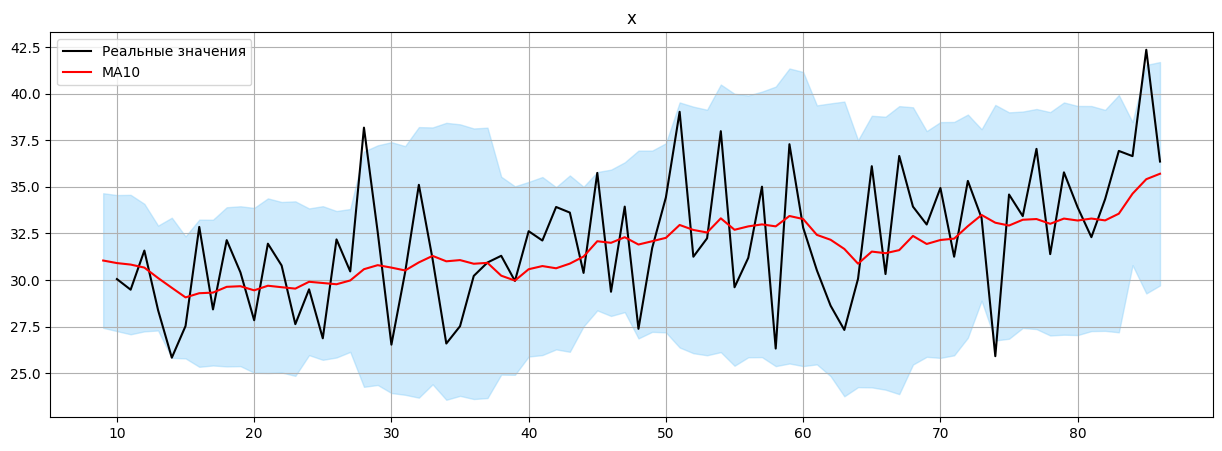

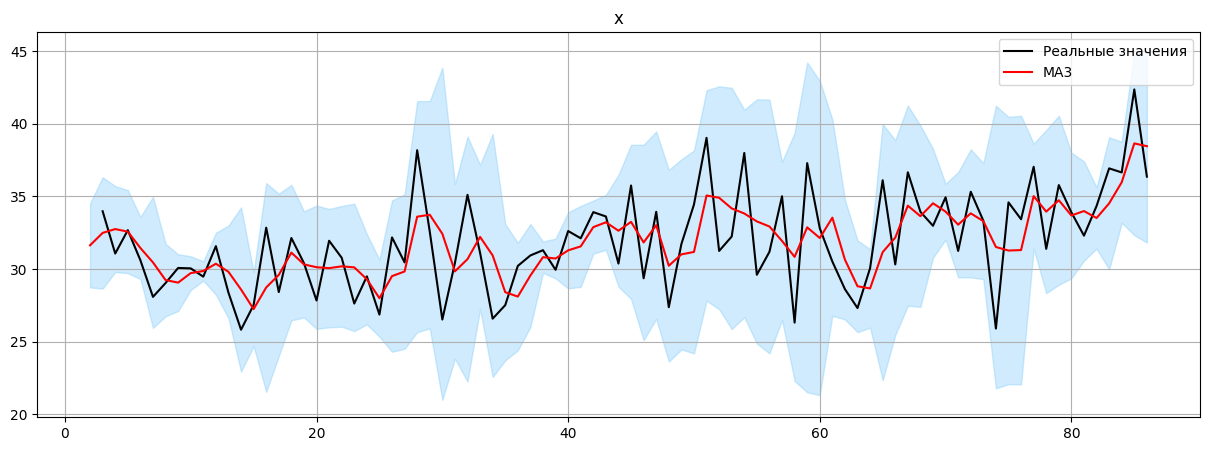

In [7]:
plot_ts(df["x"], window=10)
plot_ts(df["x"], window=3)

Модель ARMA

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [9]:
arma_model = ARIMA(df['x'], order=(5,0,3))
arma_model_fit = arma_model.fit()

d:\TS\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\TS\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\TS\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
print(arma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   87
Model:                 ARIMA(5, 0, 3)   Log Likelihood                -220.264
Date:                Thu, 21 Dec 2023   AIC                            460.529
Time:                        12:32:25   BIC                            485.188
Sample:                             0   HQIC                           470.458
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8453      2.715     12.099      0.000      27.525      38.166
ar.L1          0.3045      0.204      1.491      0.136      -0.096       0.705
ar.L2         -0.2659      0.188     -1.418      0.1

In [11]:
X = df['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

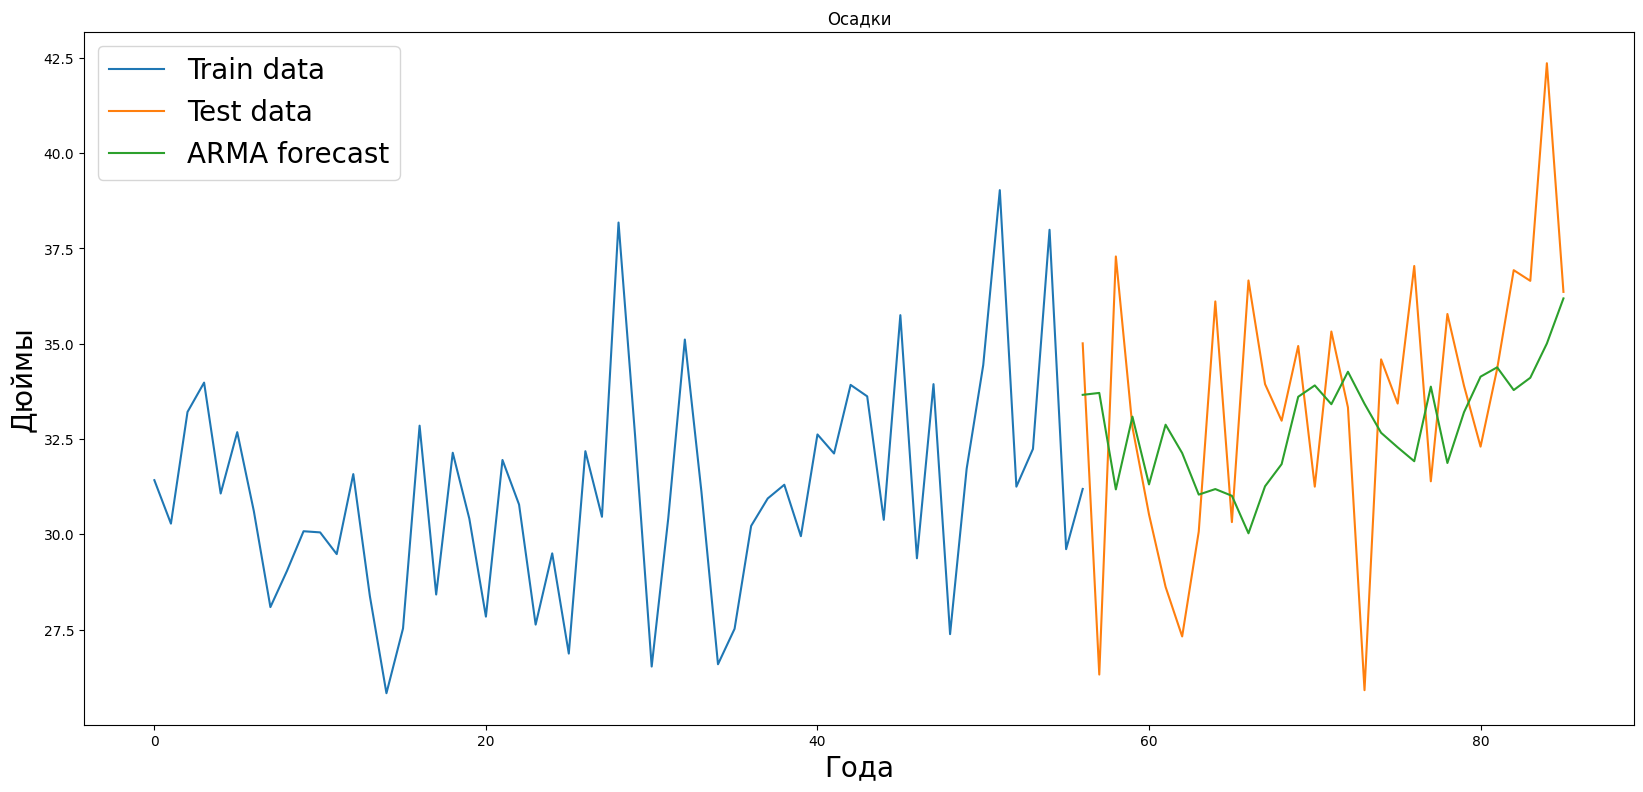

In [12]:
fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.title('Осадки')
plt.ylabel('Дюймы', fontsize="20")
plt.xlabel('Года', fontsize="20")
plt.show()

Модель ARIMA

In [13]:
arima_model = ARIMA(df['x'], order=(10,2,10))
arima_model_fit = arima_model.fit()

d:\TS\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\TS\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   87
Model:               ARIMA(10, 2, 10)   Log Likelihood                -215.307
Date:                Thu, 21 Dec 2023   AIC                            472.614
Time:                        12:32:27   BIC                            523.910
Sample:                             0   HQIC                           493.247
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7062      0.602     -2.836      0.005      -2.885      -0.527
ar.L2         -1.9661      0.702     -2.802      0.005      -3.341      -0.591
ar.L3         -2.0890      0.968     -2.158      0.0

<Axes: >

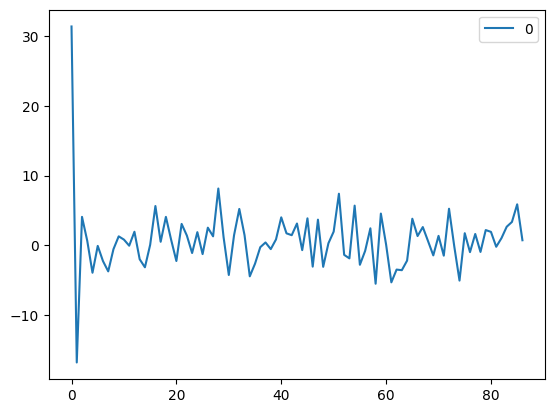

In [15]:
arima_residuals = pd.DataFrame(arima_model_fit.resid)
arima_residuals.plot()

In [16]:
X = df['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arima_predictions = list()
# walk-forward validation
for t in range(len(test)):
    arima_model = ARIMA(history, order=(10,2,5))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

d:\TS\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\TS\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\TS\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\TS\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\TS\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to

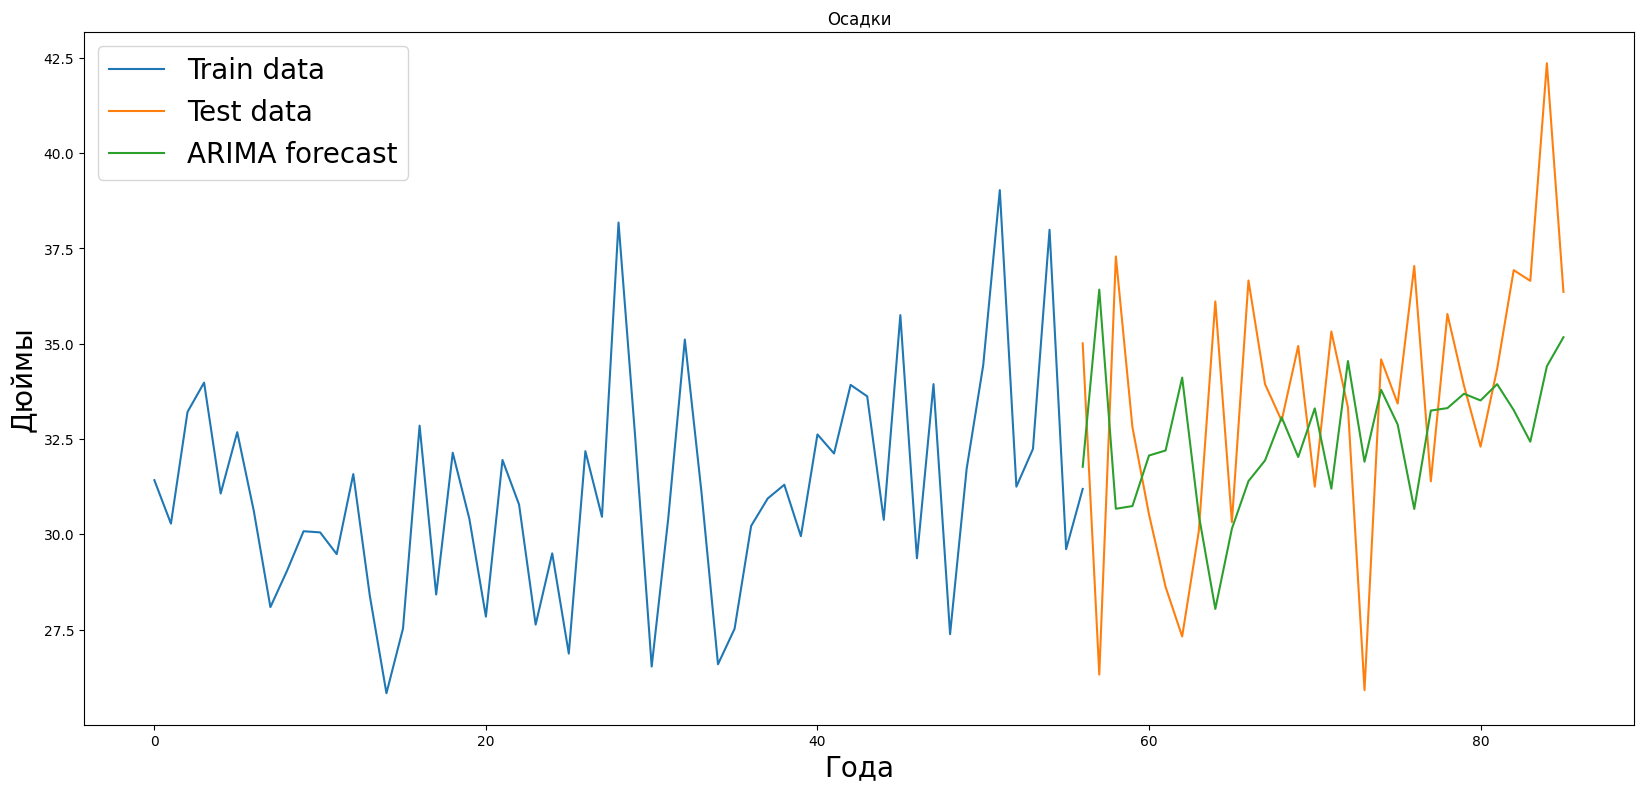

In [17]:
fig = plt.figure(figsize=(20, 9))
plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, len(X) - 1)], test, label='Test data')
plt.plot([i for i in range(size - 1, len(X) - 1)], arima_predictions, label='ARIMA forecast')
plt.legend(fontsize="20")
plt.title('Осадки')
plt.ylabel('Дюймы', fontsize="20")
plt.xlabel('Года', fontsize="20")
plt.show()

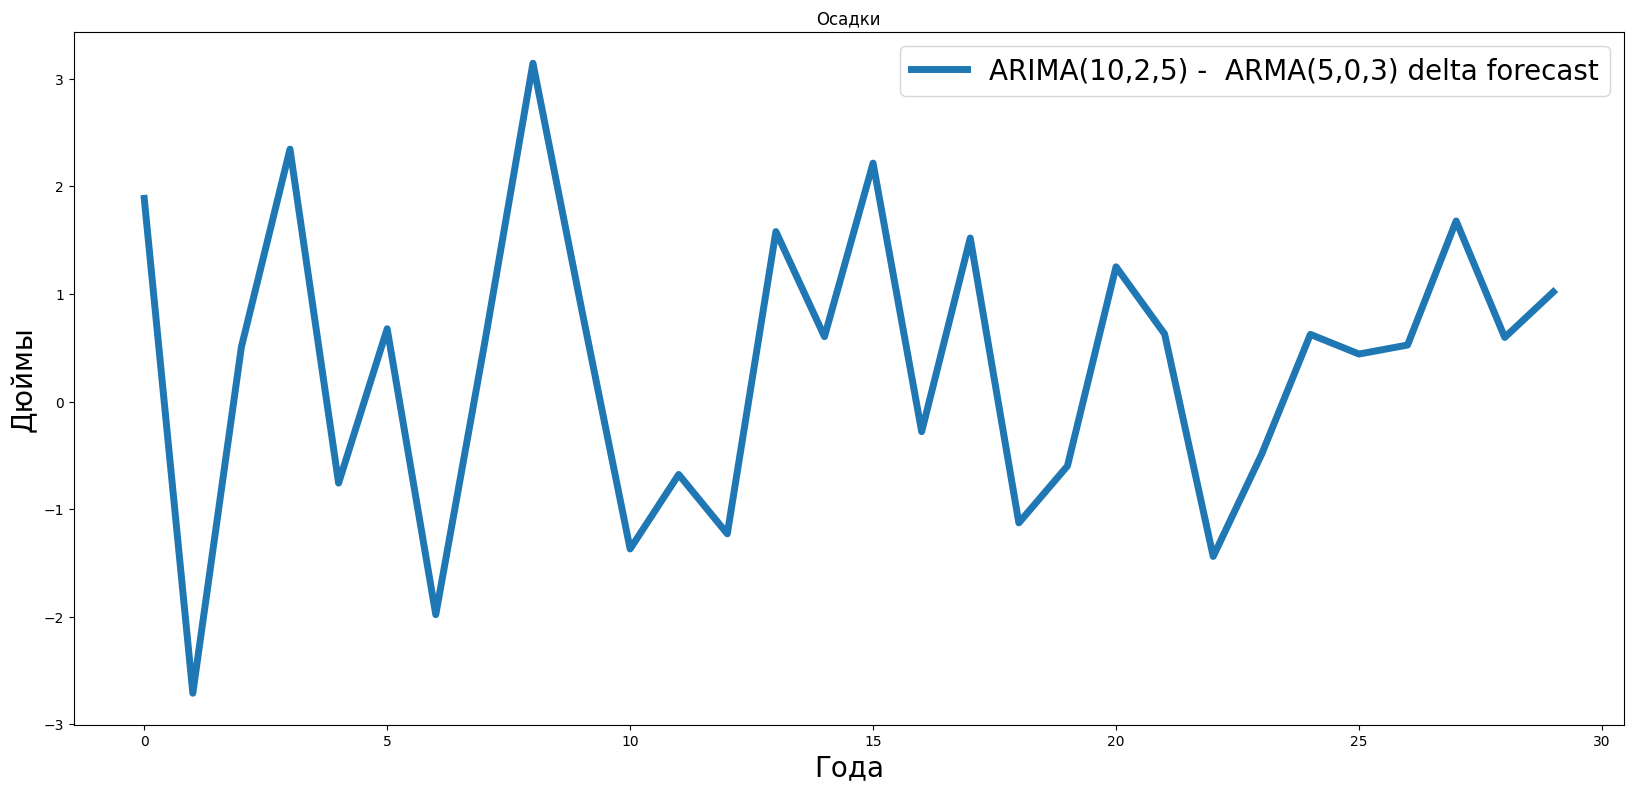

In [18]:
fig = plt.figure(figsize=(20, 9))

delta = []

for i in range(len(arima_predictions)):
    delta.append(arma_predictions[i] - arima_predictions[i])

plt.plot(delta, label='ARIMA(10,2,5) -  ARMA(5,0,3) delta forecast', linewidth=5)
plt.legend(fontsize="20")
plt.title('Осадки')
plt.ylabel('Дюймы', fontsize="20")
plt.xlabel('Года', fontsize="20")
plt.show()

Заполнение пропусков

C:\Users\k_dys\AppData\Local\Temp\ipykernel_11116\931259308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df["x"][50:55] = np.nan


<Axes: >

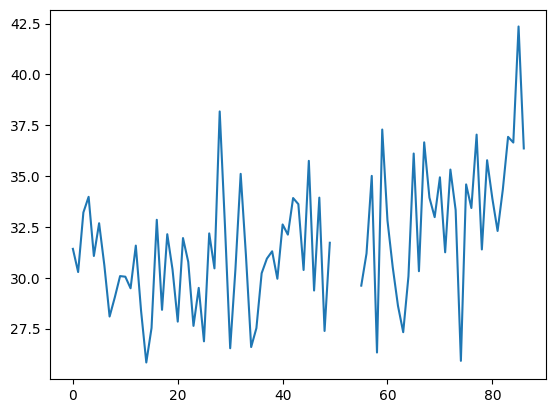

In [19]:
o_df = df.copy()

o_df["x"][50:55] = np.nan

o_df['x'].plot()

C:\Users\k_dys\AppData\Local\Temp\ipykernel_11116\707272780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df["x"][50:55] = new_value


<Axes: title={'center': 'среднее из предыдущего и последующего'}>

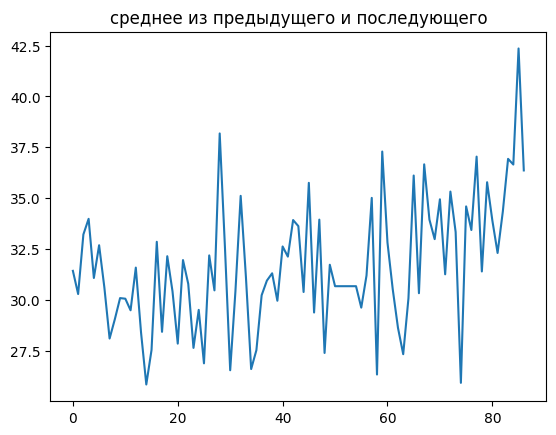

In [20]:
new_value = (o_df["x"][55] + o_df["x"][49])/2

o_df["x"][50:55] = new_value

o_df['x'].plot(title="среднее из предыдущего и последующего")

C:\Users\k_dys\AppData\Local\Temp\ipykernel_11116\1098621597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df["x"][50:55] = new_value


<Axes: title={'center': 'Последующее значение'}>

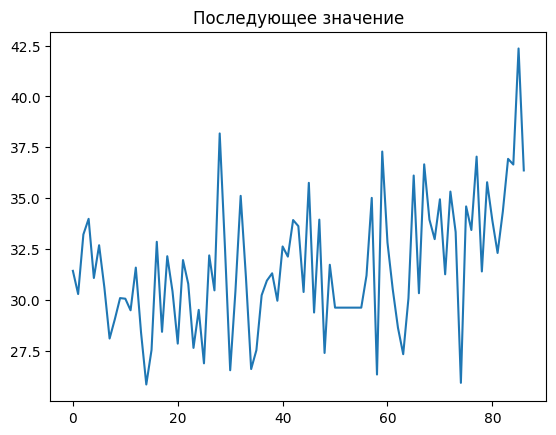

In [21]:
new_value = o_df["x"][55]

o_df["x"][50:55] = new_value

o_df['x'].plot(title='Последующее значение')

C:\Users\k_dys\AppData\Local\Temp\ipykernel_11116\1011561452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df["x"][50:55] = new_value


<Axes: title={'center': 'Предыдущее значение'}>

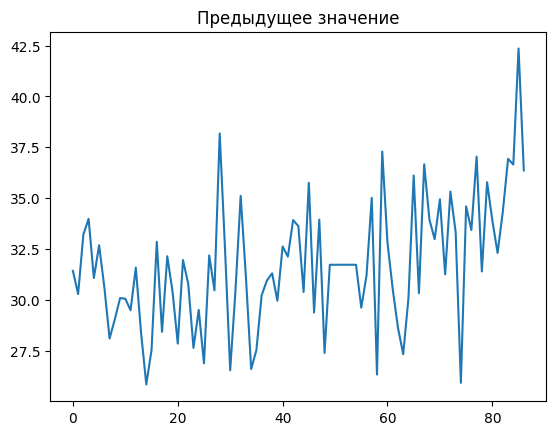

In [22]:
new_value = o_df["x"][49]

o_df["x"][50:55] = new_value

o_df['x'].plot(title='Предыдущее значение')

C:\Users\k_dys\AppData\Local\Temp\ipykernel_11116\467379027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df["x"][50:55] = new_value


<Axes: title={'center': 'медиана'}>

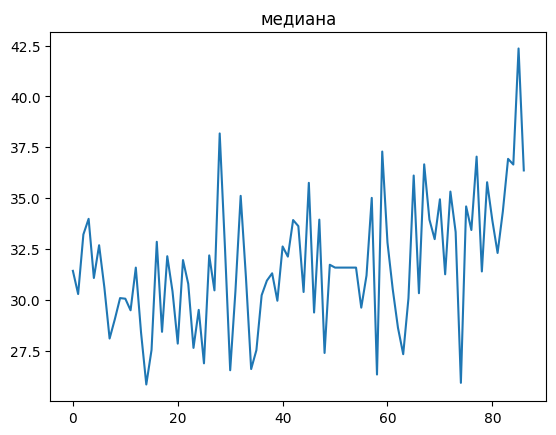

In [23]:
new_value = o_df["x"].median()

o_df["x"][50:55] = new_value

o_df['x'].plot(title='медиана') 

C:\Users\k_dys\AppData\Local\Temp\ipykernel_11116\3396909041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df["x"][50:55] = new_value


<Axes: title={'center': 'среднее'}>

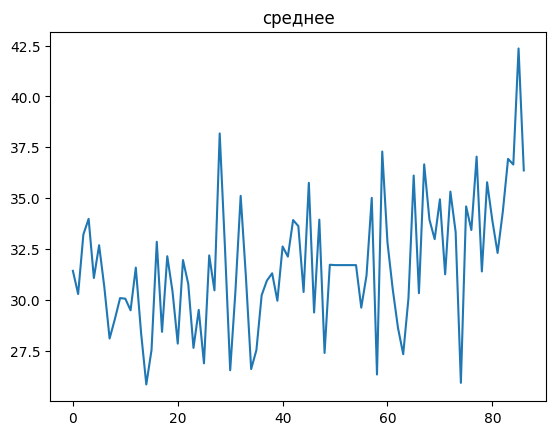

In [24]:
new_value = o_df["x"].mean()

o_df["x"][50:55] = new_value

o_df['x'].plot(title='среднее') 

C:\Users\k_dys\AppData\Local\Temp\ipykernel_11116\2701358953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_df["x"][50:55] = np.nan


<Axes: title={'center': 'zero'}>

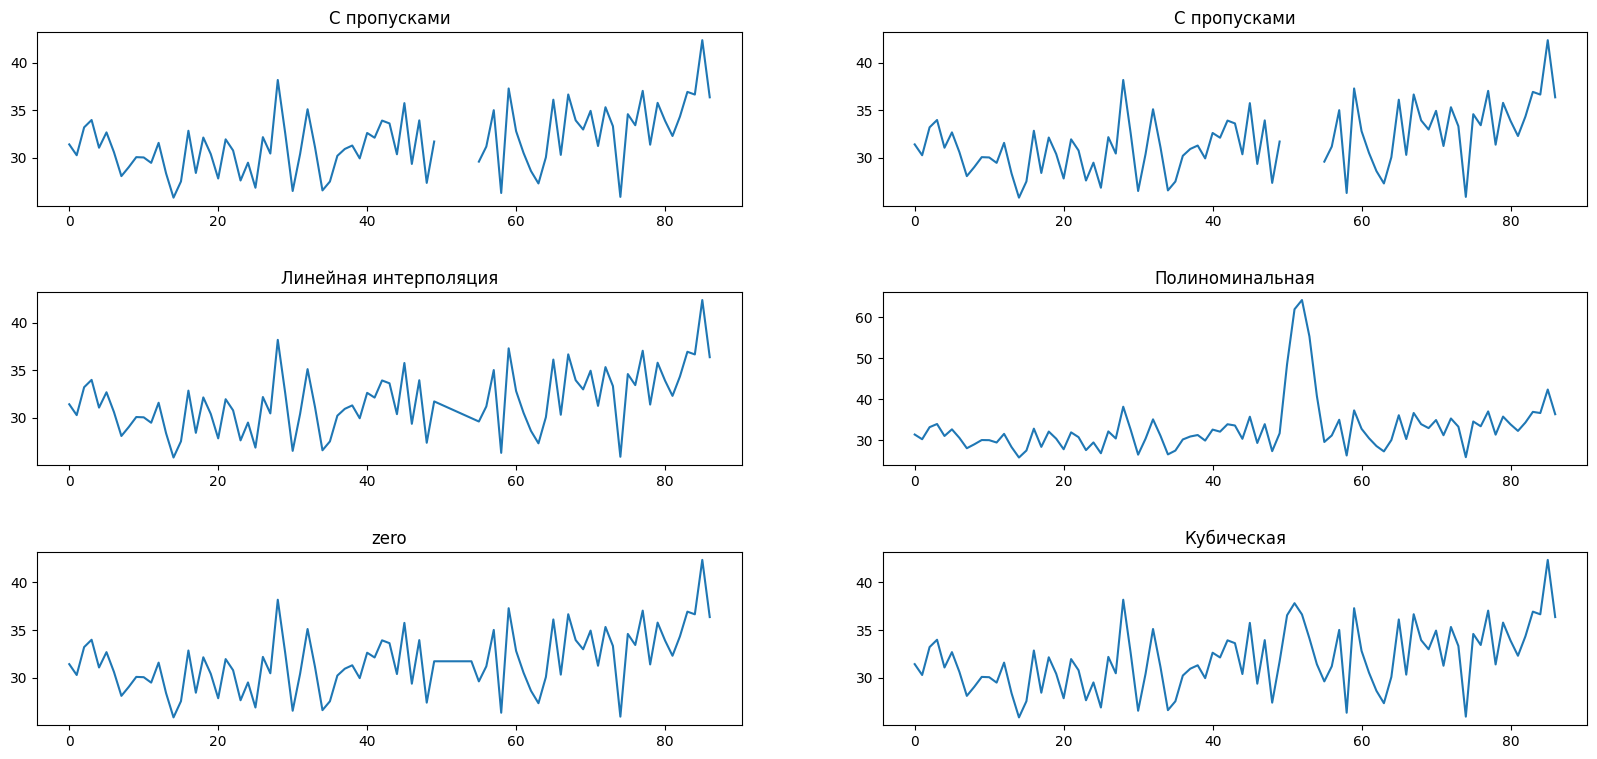

In [25]:
o_df["x"][50:55] = np.nan

lin_df = o_df['x'].interpolate(method="linear")

cub_df = o_df['x'].interpolate(method="cubic")

pol_df = o_df['x'].interpolate(method="polynomial", order=5)

zero_df = o_df['x'].interpolate(method="zero")


fig = plt.figure(figsize=(20, 9))
layout = (3, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

original_ax = plt.subplot2grid(layout, (0, 0))
lin_ax = plt.subplot2grid(layout, (1, 0))
cub_ax = plt.subplot2grid(layout, (2, 1))

pol_ax = plt.subplot2grid(layout, (1, 1))
zero_ax = plt.subplot2grid(layout, (2, 0))
 
o_df['x'].plot(title="С пропусками", ax = original_ax)  
o_df['x'].plot(title="С пропусками", ax = plt.subplot2grid(layout, (0, 1)))  
lin_df.plot(title="Линейная интерполяция", ax = lin_ax) 
cub_df.plot(title="Кубическая", ax = cub_ax) 
pol_df.plot(title="Полиноминальная", ax = pol_ax) 
zero_df.plot(title="zero", ax=zero_ax)


In [26]:
import seaborn as sns

<Axes: >

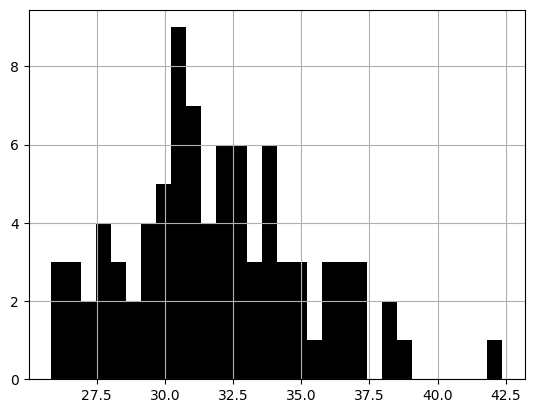

In [27]:
df["x"].hist(bins=30, color="black")

Коробка с усами

Text(0.5, 1.0, 'Осадки')

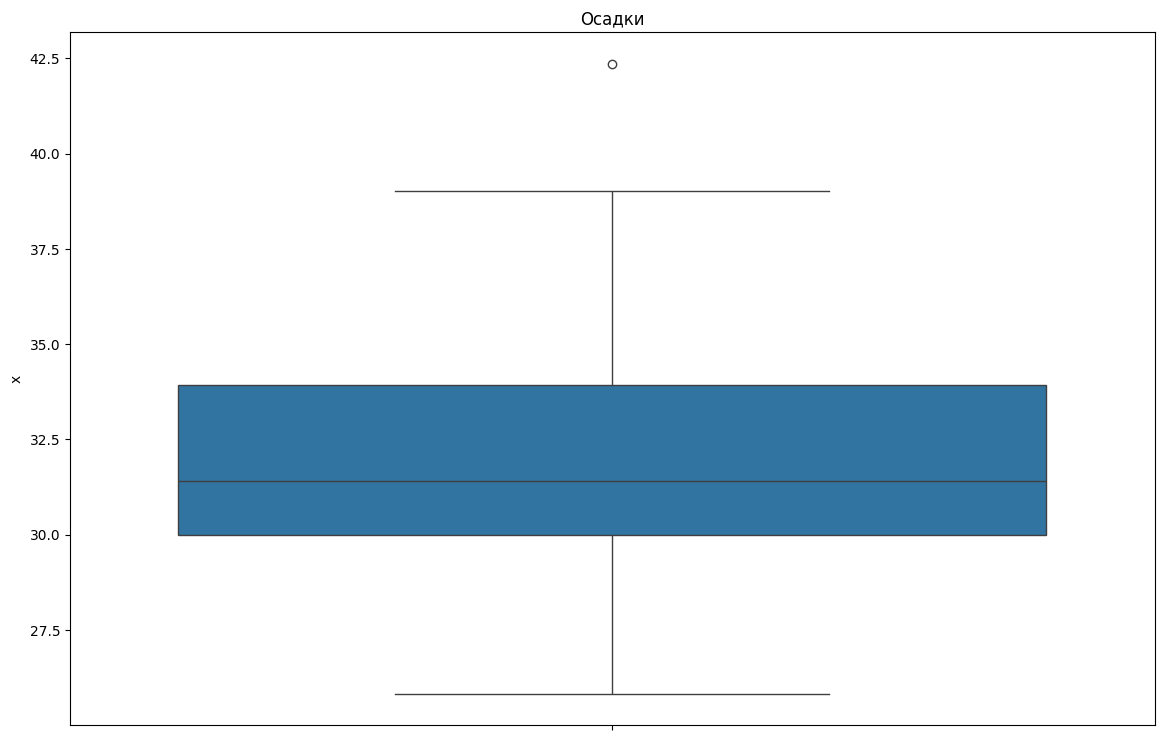

In [28]:
fig = plt.figure(figsize=(14, 9))
 
sns.boxplot(df.x).set_title('Осадки')

Ищем выбросы

In [29]:
from sklearn import preprocessing, svm

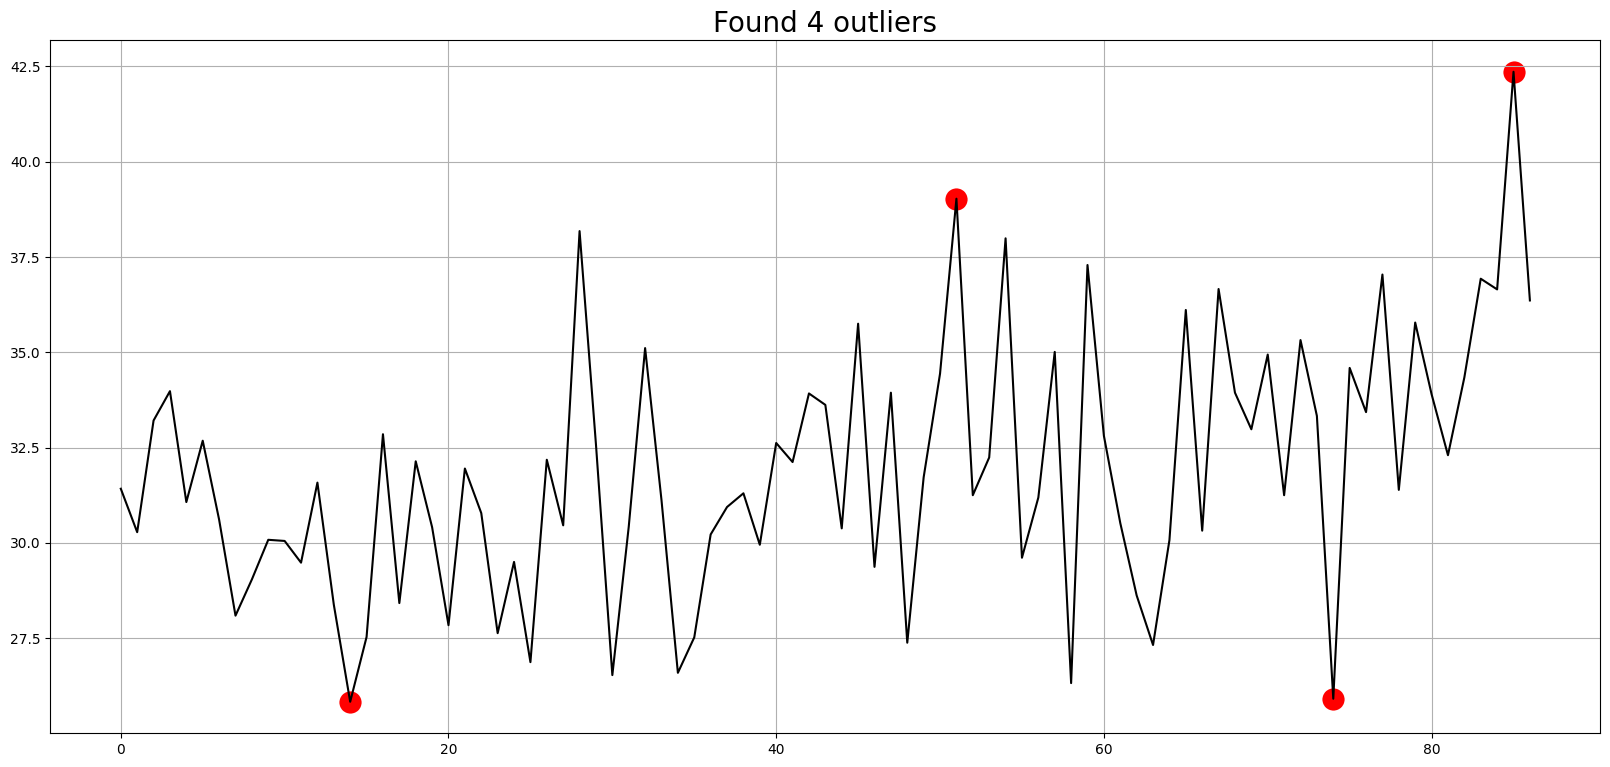

In [30]:
scaler = preprocessing.StandardScaler()
perc = 0.05

local_df = df["x"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1,1))
model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
model.fit(ts_scaled)
## dtf output
dtf_outliers =local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                                            x: 1 if x==-1 else 0)
## plot
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
        color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
           y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
           color='red', linewidths=10)
plt.title(f"Found {sum(dtf_outliers['outlier']==1)} outliers", fontdict={'fontsize': 20})
ax.grid(True)
plt.show()

Заменяем выбросы с использванием интерполяции

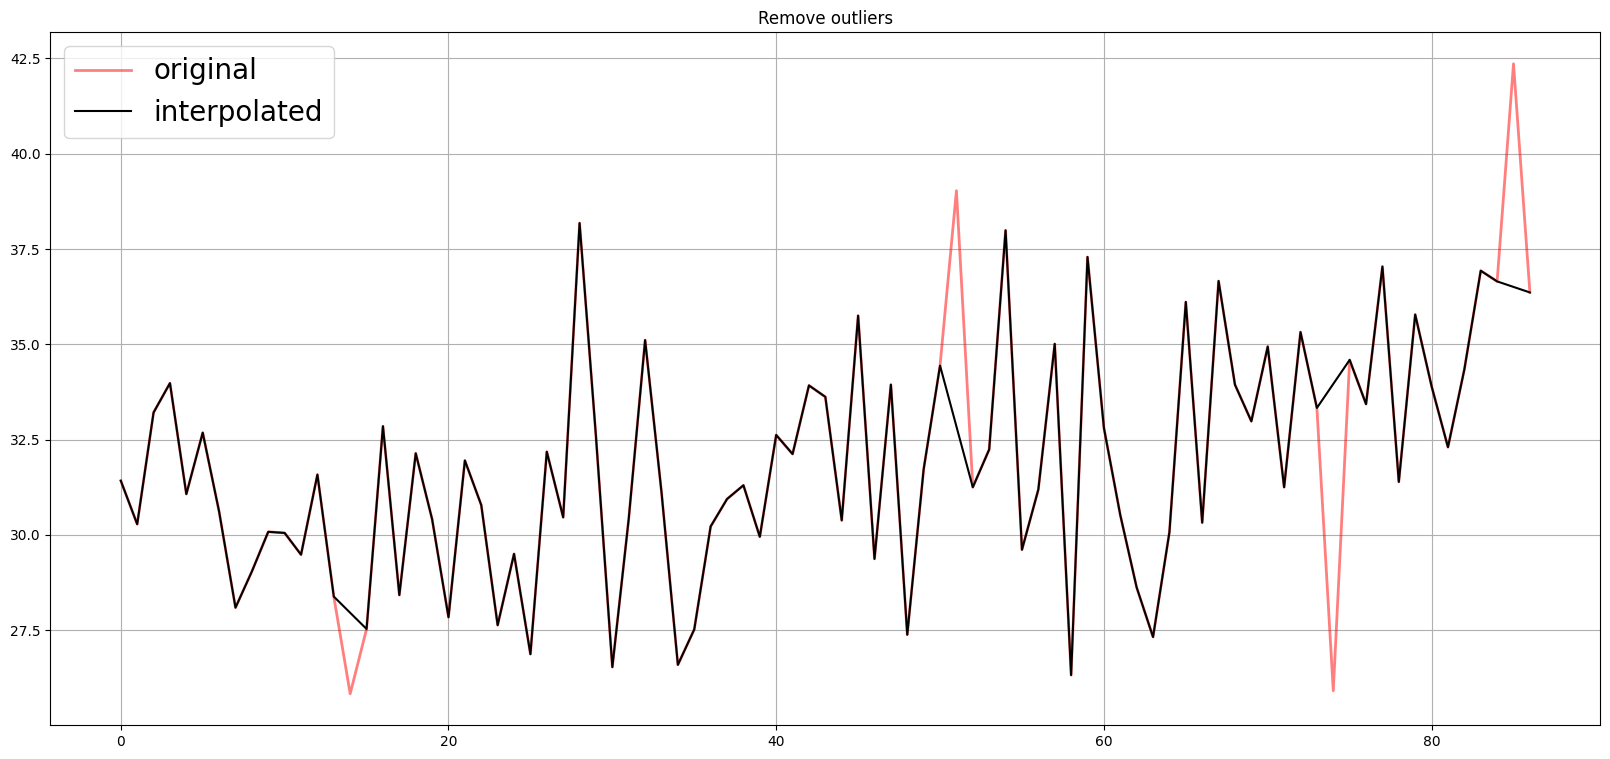

In [31]:
outliers_idx = dtf_outliers[dtf_outliers["outlier"]==1].index

ts_clean = local_df.copy()
ts_clean.loc[outliers_idx] = np.nan
ts_clean = ts_clean.interpolate(method="linear")
ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5,
             title="Remove outliers", label="original", legend=True, linewidth=2)
ts_clean.plot(ax=ax, grid=True, color="black",
              label="interpolated", legend=True)
plt.legend(fontsize="20")
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

In [33]:
def smape( data , pred ):
 return 1/ len (data) * np.sum (2 * np.abs (pred-data) / (np.abs (data) + np.abs (pred)))

ARMA - метрики

In [37]:
print("RMSE:", np.sqrt(mean_squared_error(df.x[len(df.x)-30:], arma_predictions)))
print("MAPE:", mean_absolute_percentage_error(df.x[len(df.x)-30:], arma_predictions))
print("MAE:", mean_absolute_error(df.x[len(df.x)-30:], arma_predictions))
print("R2: ", r2_score(df.x[len(df.x)-30:], arma_predictions))
print("SMAPE: ", smape(df.x[len(df.x)-30:], arma_predictions))

RMSE: 3.7002522998922505
MAPE: 0.08838685873368261
MAE: 2.8915627070654084
R2:  -0.07871444878814571
SMAPE:  0.08791591170983001


ARIMA - метрики

In [38]:
print("RMSE:", np.sqrt(mean_squared_error(df.x[len(df.x)-30:], arima_predictions)))
print("MAPE:", mean_absolute_percentage_error(df.x[len(df.x)-30:], arima_predictions))
print("MAE:", mean_absolute_error(df.x[len(df.x)-30:], arima_predictions))
print("R2: ", r2_score(df.x[len(df.x)-30:], arima_predictions))
print("SMAPE: ", smape(df.x[len(df.x)-30:], arima_predictions))

RMSE: 4.222152870796659
MAPE: 0.09847097574857194
MAE: 3.2396144451219246
R2:  -0.40446761294389244
SMAPE:  0.09847108268556748
